# Copyright Netherlands eScience Center <br>
** Function     : Analyze AMET from coordinated experiments** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2019.08.09 ** <br>
** Last Update  : 2019.08.09 ** <br>
Description     : This notebook aims to analyze AMET taken as the residuals of TOA/surface flux fields from multiple coordinated experiments in Blue Action WP3. It contributes to the Deliverable 3.1. <br>
Return Values   : netCDF4 <br>
Caveat          : The fields used here are post-processed monthly mean fields. It includes AMET from:
* EC Earth (DMI)
* CMCC-CM (CMCC)
* WACCM6 (WHOI)
* NorESM (NERSC)
* HadGEM  (UoS)
* EC Earth (NLeSC)

In [1]:
%matplotlib inline
import numpy as np
import sys
#sys.path.append("/home/ESLT0068/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import analyzer
import scipy as sp
import time as tttt
from netCDF4 import Dataset,num2date
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
# constants
constant = {'g' : 9.80616,      # gravititional acceleration [m / s2]
            'R' : 6371009,      # radius of the earth [m]
            'cp': 1004.64,      # heat capacity of air [J/(Kg*K)]
            'Lv': 2264670,      # Latent heat of vaporization [J/Kg]
            'R_dry' : 286.9,    # gas constant of dry air [J/(kg*K)]
            'R_vap' : 461.5,    # gas constant for water vapour [J/(kg*K)]
            }

|Model and Organization | Exp 1 | Exp 2 | Exp 3 | Exp 4 |    time   |
|-----------------------|-------|-------|-------|-------|-----------|
|    EC Earth (NLeSC)   |   20  |   20  |   1   |   1   | 1979-2015 (exp1&2) 1979-2013 (exp3&4) |
|     EC Earth (DMI)    |   20  |   20  |   20  |   20  | 1979-2015 (exp1&2) 1979-2013 (exp3&4) |
|     CMCC-CM (CMCC)    |   10  |   10  |   0   |   0   | 1979-2013 |
|      WACCM6 (WHOI)    |   30  |   30  |   30  |   30  | 1979-2014 (exp1&2) 1979-2012 (exp3&4) |
|     NorESM (NERSC)    |   20  |   20  |   20  |   20  | 1979-2014 (exp1&2) 1979-2013 (exp3&4) |
|     HadGEM  (UoS)     |   10  |   10  |   5   |   5   | 1979-2014 (exp1&2) 1979-2013 (exp3&4) |
|   IAP-AGCM (IAP-NZC)  |   15  |   15  |   15  |   15  | 1979-2015 (exp1&2) 1979-2013 (exp3&4) |
|     IPSL-CM (CNRS)    |   30  |   30  |   20  |   20  | 1979-2014 (exp1&2) 1979-2012 (exp3&4) |
|      MPIESM (MPI)     |   10  |   10  |   5   |   5   | 1979-2015 |

In [3]:
################################   Input zone  ######################################
# specify starting and ending time
# specify data path
datapath = '/home/ESLT0068/WorkFlow/Core_Database_BlueAction_WP3/AMET_netCDF'
# specify output path for figures
output_path = '/home/ESLT0068/NLeSC/Computation_Modeling/BlueAction/WP3/JointAnalysis_AMET/AMIP'
# how many models
models = 8
####################################################################################

In [4]:
################################   Extract variables  ######################################
# get path
# EC Earth (DMI)
datapath_DMI_exp1 = os.path.join(datapath, 'amet_ECEarth_DMI_exp1.nc')
datapath_DMI_exp2 = os.path.join(datapath, 'amet_ECEarth_DMI_exp2.nc')
datapath_DMI_exp3 = os.path.join(datapath, 'amet_ECEarth_DMI_exp3.nc')
datapath_DMI_exp4 = os.path.join(datapath, 'amet_ECEarth_DMI_exp4.nc')
# HadGEM (UoS)
datapath_UoS_exp1 = os.path.join(datapath, 'amet_HadGEM_UoS_exp1.nc')
datapath_UoS_exp2 = os.path.join(datapath, 'amet_HadGEM_UoS_exp2.nc')
datapath_UoS_exp3 = os.path.join(datapath, 'amet_HadGEM_UoS_exp3.nc')
datapath_UoS_exp4 = os.path.join(datapath, 'amet_HadGEM_UoS_exp4.nc')
# NorESM (NERSC)
datapath_NERSC_exp1 = os.path.join(datapath, 'amet_NorESM_NERSC_exp1.nc')
datapath_NERSC_exp2 = os.path.join(datapath, 'amet_NorESM_NERSC_exp2.nc')
datapath_NERSC_exp3 = os.path.join(datapath, 'amet_NorESM_NERSC_exp3.nc')
datapath_NERSC_exp4 = os.path.join(datapath, 'amet_NorESM_NERSC_exp4.nc')
# WACCM6 (WHOI)
datapath_WHOI_exp1 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp1.nc')
datapath_WHOI_exp2 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp2.nc')
# CMCC-CM (CMCC)
datapath_CMCC_exp1 = os.path.join(datapath, 'amet_CMCC-CM_CMCC_exp1.nc')
datapath_CMCC_exp2 = os.path.join(datapath, 'amet_CMCC-CM_CMCC_exp2.nc')
# IPSL-CM (CNRS)
datapath_CNRS_exp1 = os.path.join(datapath, 'amet_IPSL-CM_CNRS_exp1.nc')
datapath_CNRS_exp2 = os.path.join(datapath, 'amet_IPSL-CM_CNRS_exp2.nc')
datapath_CNRS_exp3 = os.path.join(datapath, 'amet_IPSL-CM_CNRS_exp3.nc')
datapath_CNRS_exp4 = os.path.join(datapath, 'amet_IPSL-CM_CNRS_exp4.nc')
# IAP-AGCM (IAP-NZC)	
datapath_IAP_exp1 = os.path.join(datapath, 'amet_IAP-AGCM_IAP-NZC_exp1.nc')
datapath_IAP_exp2 = os.path.join(datapath, 'amet_IAP-AGCM_IAP-NZC_exp2.nc')
datapath_IAP_exp3 = os.path.join(datapath, 'amet_IAP-AGCM_IAP-NZC_exp3.nc')
datapath_IAP_exp4 = os.path.join(datapath, 'amet_IAP-AGCM_IAP-NZC_exp4.nc')

# get variable key
# EC Earth (DMI)
key_DMI_exp1 = Dataset(datapath_DMI_exp1)
key_DMI_exp2 = Dataset(datapath_DMI_exp2)
key_DMI_exp3 = Dataset(datapath_DMI_exp3)
key_DMI_exp4 = Dataset(datapath_DMI_exp4)
# HadGEM (UoS)
key_UoS_exp1 = Dataset(datapath_UoS_exp1)
key_UoS_exp2 = Dataset(datapath_UoS_exp2)
key_UoS_exp3 = Dataset(datapath_UoS_exp3)
key_UoS_exp4 = Dataset(datapath_UoS_exp4)
# NorESM (NERSC)
key_NERSC_exp1 = Dataset(datapath_NERSC_exp1)
key_NERSC_exp2 = Dataset(datapath_NERSC_exp2)
key_NERSC_exp3 = Dataset(datapath_NERSC_exp3)
key_NERSC_exp4 = Dataset(datapath_NERSC_exp4)
# WACCM6 (WHOI)
key_WHOI_exp1 = Dataset(datapath_WHOI_exp1)
key_WHOI_exp2 = Dataset(datapath_WHOI_exp2)
# CMCC-CM (CMCC)
key_CMCC_exp1 = Dataset(datapath_CMCC_exp1)
key_CMCC_exp2 = Dataset(datapath_CMCC_exp2)
# IPSL-CM (CNRS)
key_CNRS_exp1 = Dataset(datapath_CNRS_exp1)
key_CNRS_exp2 = Dataset(datapath_CNRS_exp2)
key_CNRS_exp3 = Dataset(datapath_CNRS_exp3)
key_CNRS_exp4 = Dataset(datapath_CNRS_exp4)
# IAP-AGCM (IAP-NZC)
key_IAP_exp1 = Dataset(datapath_IAP_exp1)
key_IAP_exp2 = Dataset(datapath_IAP_exp2)
key_IAP_exp3 = Dataset(datapath_IAP_exp3)
key_IAP_exp4 = Dataset(datapath_IAP_exp4)
# get amet
# dimension[ensemble, year, month, lat]
# EC Earth (DMI)
################################   AMET  ######################################
AMET_DMI_exp1 = key_DMI_exp1.variables['amet'][:]
AMET_DMI_exp2 = key_DMI_exp2.variables['amet'][:]
AMET_DMI_exp3 = key_DMI_exp3.variables['amet'][:]
AMET_DMI_exp4 = key_DMI_exp4.variables['amet'][:]
# HadGEM (UoS)
AMET_UoS_exp1 = key_UoS_exp1.variables['amet'][:]
AMET_UoS_exp2 = key_UoS_exp2.variables['amet'][:]
AMET_UoS_exp3 = key_UoS_exp3.variables['amet'][:]
AMET_UoS_exp4 = key_UoS_exp4.variables['amet'][:]
# NorESM (NERSC)
AMET_NERSC_exp1 = key_NERSC_exp1.variables['amet'][:]
AMET_NERSC_exp2 = key_NERSC_exp2.variables['amet'][:]
AMET_NERSC_exp3 = key_NERSC_exp3.variables['amet'][:]
AMET_NERSC_exp4 = key_NERSC_exp4.variables['amet'][:]
# WACCM6 (WHOI)
AMET_WHOI_exp1 = key_WHOI_exp1.variables['amet'][:]
AMET_WHOI_exp2 = key_WHOI_exp2.variables['amet'][:]
# CMCC-CM (CMCC)
AMET_CMCC_exp1 = key_CMCC_exp1.variables['amet'][:]
AMET_CMCC_exp2 = key_CMCC_exp2.variables['amet'][:]
# IPSL-CM (CNRS)
AMET_CNRS_exp1 = key_CNRS_exp1.variables['amet'][:]
AMET_CNRS_exp2 = key_CNRS_exp2.variables['amet'][:]
AMET_CNRS_exp3 = key_CNRS_exp3.variables['amet'][:]
AMET_CNRS_exp4 = key_CNRS_exp4.variables['amet'][:]
# IAP-AGCM (IAP-NZC)
AMET_IAP_exp1 = key_IAP_exp1.variables['amet'][:]
AMET_IAP_exp2 = key_IAP_exp2.variables['amet'][:]
AMET_IAP_exp3 = key_IAP_exp3.variables['amet'][:]
AMET_IAP_exp4 = key_IAP_exp4.variables['amet'][:]
# EC Earth (DMI)
lat_DMI = key_DMI_exp1.variables['latitude'][:]
# HadGEM (UoS)
lat_UoS = key_UoS_exp1.variables['latitude'][:]
# NorESM (NERSC)
lat_NERSC = key_NERSC_exp1.variables['latitude'][:]
# WACCM6 (WHOI)
lat_WHOI = key_WHOI_exp1.variables['latitude'][:]
# CMCC-CM (CMCC)
lat_CMCC = key_CMCC_exp1.variables['latitude'][:]
# IPSL-CM (CNRS)
lat_CNRS = key_CNRS_exp1.variables['latitude'][:]
# IAP-AGCM (IAP-NZC)
lat_IAP = key_IAP_exp1.variables['latitude'][:]

***********  60N  ************
59.999813
59.842934
59.842934
60.277782
59.842934
59.577465
60.23622
***********  20N  ************
[90.       88.58268  87.16535  85.74803  84.33071  82.91338  81.49606
 80.07874  78.661415 77.244095 75.826775 74.40945  72.99213  71.57481
 70.15748  68.74016  67.32284  65.90551  64.48819  63.070866 61.65354
 60.23622  58.818897 57.401573 55.984253 54.56693  53.149605 51.732285
 50.31496  48.897636 47.480316 46.062992 44.645668 43.228348 41.811024
 40.3937   38.97638  37.559055 36.14173  34.72441  33.307087 31.889763
 30.47244  29.055119 27.637794 26.220472 24.80315  23.385826 21.968504
 20.551182]


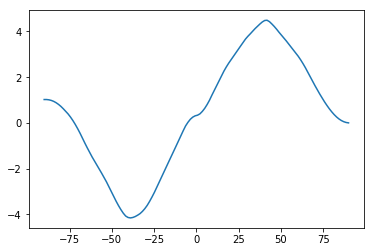

In [11]:
################################   Only for a first-check  ######################################
#print(AMET_CMCC_exp1.shape)
plt.plot(lat_IAP, np.mean(AMET_IAP_exp1[0,0,:,:],0))
print("***********  60N  ************")
print(lat_DMI[42])
print(lat_WHOI[32])
print(lat_NERSC[32])
print(lat_UoS[53])
print(lat_CMCC[32])
print(lat_CNRS[24])
print(lat_IAP[21])
print("***********  20N  ************")
#print(lat_DMI[:100])
#print(lat_WHOI[:75])
#print(lat_NERSC[:75])
#print(lat_UoS[:127])
#print(lat_CMCC[:75])
#print(lat_CNRS[:56])
print(lat_IAP[:50])

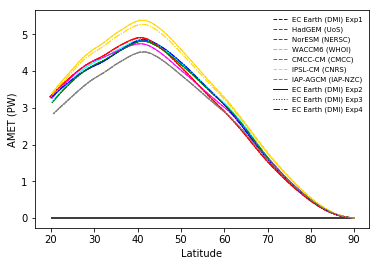

In [8]:
################################   Annual mean at different lat  ######################################
################################   only ensemble mean is used    ######################################
####################### color map #######################
####            EC Earth (NLeSC) : 'dodgerblue'      ####
####            EC Earth (DMI)   : 'blue'            ####
####            HadGEM (UoS)     : 'red'             ####
####            NorESM (NERSC)   : 'green'           ####
####            WACCM6 (WHOI)    : 'cyan'            ####
####            CMCC-CM (CMCC)   : 'magenta'         ####
####            IPSL-CM (CNRS)   : 'gold'            ####
####        IAP-AGCM (IAP-NZC)   : 'gray'            ####
####################### color map #######################
####################### linestyles ######################
####          exp 1 (control)     : '--'             ####
####          exp 2 (sic fixed)   : '-'              ####
####          exp 3 (PDO removed) : ':'              ####
####          exp 4 (AMO removed) : '-.'             ####
####################### color map #######################
# EC Earth (DMI)
ens, yy, mm, _ = AMET_DMI_exp1.shape
fig = plt.figure()
plt.hlines(0,np.amin(lat_DMI[:100]), np.amax(lat_DMI[:100]),'k')
# Exp1
# EC Earth (DMI)
plt.plot(lat_DMI[:100], np.mean(np.mean(np.mean(AMET_DMI_exp1[:,:,:,:100],0),0),0),
         color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI) Exp1')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], np.mean(np.mean(np.mean(AMET_UoS_exp1[:,:,:,:127],0),0),0),
         color='red', linestyle='--', linewidth=1, label='HadGEM (UoS)')
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], np.mean(np.mean(np.mean(AMET_NERSC_exp1[:,:,:,:75],0),0),0),
         color='green', linestyle='--', linewidth=1, label='NorESM (NERSC)')
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], np.mean(np.mean(np.mean(AMET_WHOI_exp1[:,:,:,:75],0),0),0),
         color='cyan', linestyle='--', linewidth=1, label='WACCM6 (WHOI)')
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:75], np.mean(np.mean(np.mean(AMET_CMCC_exp1[:,:,:,:75],0),0),0),
         color='magenta', linestyle='--', linewidth=1, label='CMCC-CM (CMCC)')
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], np.mean(np.mean(np.mean(AMET_CNRS_exp1[:,:,:,:56],0),0),0),
         color='gold', linestyle='--', linewidth=1, label='IPSL-CM (CNRS)')
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], np.mean(np.mean(np.mean(AMET_IAP_exp1[:,:,:,:50],0),0),0),
         color='gray', linestyle='--', linewidth=1, label='IAP-AGCM (IAP-NZC)')
# Exp2
# EC Earth (DMI)
plt.plot(lat_DMI[:100], np.mean(np.mean(np.mean(AMET_DMI_exp2[:,:,:,:100],0),0),0),
         color='blue', linestyle='-', linewidth=1, label='EC Earth (DMI) Exp2')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], np.mean(np.mean(np.mean(AMET_UoS_exp2[:,:,:,:127],0),0),0),
         color='red', linestyle='-', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], np.mean(np.mean(np.mean(AMET_NERSC_exp2[:,:,:,:75],0),0),0),
         color='green', linestyle='-', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], np.mean(np.mean(np.mean(AMET_WHOI_exp2[:,:,:,:75],0),0),0),
         color='cyan', linestyle='-', linewidth=1)
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:75], np.mean(np.mean(np.mean(AMET_CMCC_exp2[:,:,:,:75],0),0),0),
         color='magenta', linestyle='-', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], np.mean(np.mean(np.mean(AMET_CNRS_exp2[:,:,:,:56],0),0),0),
         color='gold', linestyle='-', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], np.mean(np.mean(np.mean(AMET_IAP_exp2[:,:,:,:50],0),0),0),
         color='gray', linestyle='-', linewidth=1)
# Exp3
# EC Earth (DMI)
plt.plot(lat_DMI[:100], np.mean(np.mean(np.mean(AMET_DMI_exp3[:,:,:,:100],0),0),0),
         color='blue', linestyle=':', linewidth=1, label='EC Earth (DMI) Exp3')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], np.mean(np.mean(np.mean(AMET_UoS_exp3[:,:,:,:127],0),0),0),
         color='red', linestyle=':', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], np.mean(np.mean(np.mean(AMET_NERSC_exp3[:,:,:,:75],0),0),0),
         color='green', linestyle=':', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], np.mean(np.mean(np.mean(AMET_CNRS_exp3[:,:,:,:56],0),0),0),
         color='gold', linestyle=':', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], np.mean(np.mean(np.mean(AMET_IAP_exp3[:,:,:,:50],0),0),0),
         color='gray', linestyle=':', linewidth=1)
# Exp4
# EC Earth (DMI)
plt.plot(lat_DMI[:100], np.mean(np.mean(np.mean(AMET_DMI_exp4[:,:,:,:100],0),0),0),
         color='blue', linestyle='-.', linewidth=1, label='EC Earth (DMI) Exp4')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], np.mean(np.mean(np.mean(AMET_UoS_exp4[:,:,:,:127],0),0),0),
         color='red', linestyle='-.', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], np.mean(np.mean(np.mean(AMET_NERSC_exp4[:,:,:,:75],0),0),0),
         color='green', linestyle='-.', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], np.mean(np.mean(np.mean(AMET_CNRS_exp4[:,:,:,:56],0),0),0),
         color='gold', linestyle='-.', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], np.mean(np.mean(np.mean(AMET_IAP_exp4[:,:,:,:50],0),0),0),
         color='gray', linestyle='-.', linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("AMET (PW)")
plt.legend(frameon=False, loc=1, prop={'size': 7})
plt.show()
fig.savefig(os.path.join(output_path,'Annual_mean_ensAvg_AMIP.png'),dpi=200)
plt.close(fig)

Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input

/home/ESLT0068/NLeSC/Computation_Modeling/BlueAction/WP3/Scripts/JointAnalysis/Analysis/analyzer.py:206: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a[i], b[i] = np.linalg.lstsq(A,series[:,i])[0]


Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input

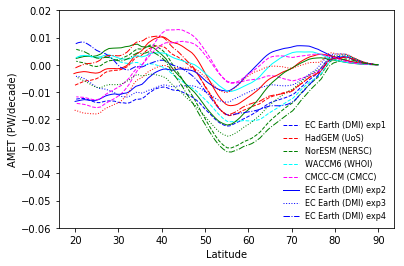

In [33]:
##############################   Anomalies trend at different lat     #################################
################################   only ensemble mean is used    ######################################
####################### color map #######################
####            EC Earth (NLeSC) : 'darkblue'        ####
####            EC Earth (DMI)   : 'blue'            ####
####            HadGEM (UoS)     : 'red'             ####
####            NorESM (NERSC)   : 'green'           ####
####            WACCM6 (WHOI)    : 'cyan'            ####
####            CMCC-CM (CMCC)   : 'magenta'         ####
####            IPSL-CM (CNRS)   : 'gold'            ####
####################### color map #######################
####################### linestyles ######################
####          exp 1 (control)     : '--'             ####
####          exp 2 (sic fixed)   : '-'              ####
####          exp 3 (PDO removed) : ':'              ####
####          exp 4 (AMO removed) : '-.'             ####
####################### color map #######################
# EC Earth (DMI)
#ens_DMI_exp1 = analyzer.statistics(AMET_DMI_exp1[:,:,:,:])
#ens_DMI_exp1.anomaly()
#ens_DMI_exp1.lowpass()
ens_avg_DMI_exp1 = analyzer.statistics(np.mean(AMET_DMI_exp1[:,:,:,:],0))
ens_avg_DMI_exp1.anomaly(Dim_ens=False)
ens_avg_DMI_exp1.trend(Dim_ens=False)
ens_avg_DMI_exp2 = analyzer.statistics(np.mean(AMET_DMI_exp2[:,:,:,:],0))
ens_avg_DMI_exp2.anomaly(Dim_ens=False)
ens_avg_DMI_exp2.trend(Dim_ens=False)
ens_avg_DMI_exp3 = analyzer.statistics(np.mean(AMET_DMI_exp3[:,:,:,:],0))
ens_avg_DMI_exp3.anomaly(Dim_ens=False)
ens_avg_DMI_exp3.trend(Dim_ens=False)
ens_avg_DMI_exp4 = analyzer.statistics(np.mean(AMET_DMI_exp4[:,:,:,:],0))
ens_avg_DMI_exp4.anomaly(Dim_ens=False)
ens_avg_DMI_exp4.trend(Dim_ens=False)

# HadGEM (UoS)
#ens_DMI_exp1 = analyzer.statistics(AMET_DMI_exp1[:,:,:,:])
#ens_DMI_exp1.anomaly()
#ens_DMI_exp1.lowpass()
ens_avg_UoS_exp1 = analyzer.statistics(np.mean(AMET_UoS_exp1[:,:,:,:],0))
ens_avg_UoS_exp1.anomaly(Dim_ens=False)
ens_avg_UoS_exp1.trend(Dim_ens=False)
ens_avg_UoS_exp2 = analyzer.statistics(np.mean(AMET_UoS_exp2[:,:,:,:],0))
ens_avg_UoS_exp2.anomaly(Dim_ens=False)
ens_avg_UoS_exp2.trend(Dim_ens=False)
ens_avg_UoS_exp3 = analyzer.statistics(np.mean(AMET_UoS_exp3[:,:,:,:],0))
ens_avg_UoS_exp3.anomaly(Dim_ens=False)
ens_avg_UoS_exp3.trend(Dim_ens=False)
ens_avg_UoS_exp4 = analyzer.statistics(np.mean(AMET_UoS_exp4[:,:,:,:],0))
ens_avg_UoS_exp4.anomaly(Dim_ens=False)
ens_avg_UoS_exp4.trend(Dim_ens=False)

# NorESM (NERSC)
#ens_NERSC_exp1 = analyzer.statistics(AMET_NERSC_exp1[:,:,:,:])
#ens_NERSC_exp1.anomaly()
#ens_NERSC_exp1.lowpass()
ens_avg_NERSC_exp1 = analyzer.statistics(np.mean(AMET_NERSC_exp1[:,:,:,:],0))
ens_avg_NERSC_exp1.anomaly(Dim_ens=False)
ens_avg_NERSC_exp1.trend(Dim_ens=False)
ens_avg_NERSC_exp2 = analyzer.statistics(np.mean(AMET_NERSC_exp2[:,:,:,:],0))
ens_avg_NERSC_exp2.anomaly(Dim_ens=False)
ens_avg_NERSC_exp2.trend(Dim_ens=False)
ens_avg_NERSC_exp3 = analyzer.statistics(np.mean(AMET_NERSC_exp3[:,:,:,:],0))
ens_avg_NERSC_exp3.anomaly(Dim_ens=False)
ens_avg_NERSC_exp3.trend(Dim_ens=False)
ens_avg_NERSC_exp4 = analyzer.statistics(np.mean(AMET_NERSC_exp4[:,:,:,:],0))
ens_avg_NERSC_exp4.anomaly(Dim_ens=False)
ens_avg_NERSC_exp4.trend(Dim_ens=False)

# WACCM6 (WHOI)
ens_avg_WHOI_exp1 = analyzer.statistics(np.mean(AMET_WHOI_exp1[:,:,:,:],0))
ens_avg_WHOI_exp1.anomaly(Dim_ens=False)
ens_avg_WHOI_exp1.trend(Dim_ens=False)
ens_avg_WHOI_exp2 = analyzer.statistics(np.mean(AMET_WHOI_exp2[:,:,:,:],0))
ens_avg_WHOI_exp2.anomaly(Dim_ens=False)
ens_avg_WHOI_exp2.trend(Dim_ens=False)

# CMCC-CM (CMCC)
ens_avg_CMCC_exp1 = analyzer.statistics(np.mean(AMET_CMCC_exp1[:,:,:,:],0))
ens_avg_CMCC_exp1.anomaly(Dim_ens=False)
ens_avg_CMCC_exp1.trend(Dim_ens=False)
ens_avg_CMCC_exp2 = analyzer.statistics(np.mean(AMET_CMCC_exp2[:,:,:,:],0))
ens_avg_CMCC_exp2.anomaly(Dim_ens=False)
ens_avg_CMCC_exp2.trend(Dim_ens=False)

# IPSL-CM (CNRS)
ens_avg_CNRS_exp1 = analyzer.statistics(np.mean(AMET_CNRS_exp1[:,:,:,:],0))
ens_avg_CNRS_exp1.anomaly(Dim_ens=False)
ens_avg_CNRS_exp1.trend(Dim_ens=False)
ens_avg_CNRS_exp2 = analyzer.statistics(np.mean(AMET_CNRS_exp2[:,:,:,:],0))
ens_avg_CNRS_exp2.anomaly(Dim_ens=False)
ens_avg_CNRS_exp2.trend(Dim_ens=False)
ens_avg_CNRS_exp3 = analyzer.statistics(np.mean(AMET_CNRS_exp3[:,:,:,:],0))
ens_avg_CNRS_exp3.anomaly(Dim_ens=False)
ens_avg_CNRS_exp3.trend(Dim_ens=False)
ens_avg_CNRS_exp4 = analyzer.statistics(np.mean(AMET_CNRS_exp4[:,:,:,:],0))
ens_avg_CNRS_exp4.anomaly(Dim_ens=False)
ens_avg_CNRS_exp4.trend(Dim_ens=False)

fig = plt.figure()
# Exp1
#EC Earth (DMI)
plt.plot(lat_DMI[:100], ens_avg_DMI_exp1._a[:100]*120, color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI) exp1')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], ens_avg_UoS_exp1._a[:127]*120, color='red', linestyle='--', linewidth=1, label='HadGEM (UoS)')
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], ens_avg_NERSC_exp1._a[:75]*120, color='green', linestyle='--', linewidth=1, label='NorESM (NERSC)')
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], ens_avg_WHOI_exp1._a[:75]*120, color='cyan', linestyle='--', linewidth=1, label='WACCM6 (WHOI)')
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:75], ens_avg_CMCC_exp1._a[:75]*120, color='magenta', linestyle='--', linewidth=1, label='CMCC-CM (CMCC)')
# Exp2
#EC Earth (DMI)
plt.plot(lat_DMI[:100], ens_avg_DMI_exp2._a[:100]*120, color='blue', linestyle='-', linewidth=1, label='EC Earth (DMI) exp2')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], ens_avg_UoS_exp2._a[:127]*120, color='red', linestyle='-', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], ens_avg_NERSC_exp2._a[:75]*120, color='green', linestyle='-', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], ens_avg_WHOI_exp2._a[:75]*120, color='cyan', linestyle='-', linewidth=1)
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:75], ens_avg_CMCC_exp2._a[:75]*120, color='magenta', linestyle='-', linewidth=1)
# Exp3
#EC Earth (DMI)
plt.plot(lat_DMI[:100], ens_avg_DMI_exp3._a[:100]*120, color='blue', linestyle=':', linewidth=1, label='EC Earth (DMI) exp3')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], ens_avg_UoS_exp3._a[:127]*120, color='red', linestyle=':', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], ens_avg_NERSC_exp3._a[:75]*120, color='green', linestyle=':', linewidth=1)
# Exp4
#EC Earth (DMI)
plt.plot(lat_DMI[:100], ens_avg_DMI_exp4._a[:100]*120, color='blue', linestyle='-.', linewidth=1, label='EC Earth (DMI) exp4')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], ens_avg_UoS_exp4._a[:127]*120, color='red', linestyle='-.', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], ens_avg_NERSC_exp4._a[:75]*120, color='green', linestyle='-.', linewidth=1)

plt.xlabel("Latitude")
plt.ylabel("AMET (PW/decade)")
plt.ylim(-0.06,0.02)
plt.legend(frameon=False, loc=4, prop={'size': 8})
plt.show()
fig.savefig(os.path.join(output_path,'Anomaly_trend_60N_ensAvg_AMIP.png'),dpi=200)
plt.close(fig)

Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input

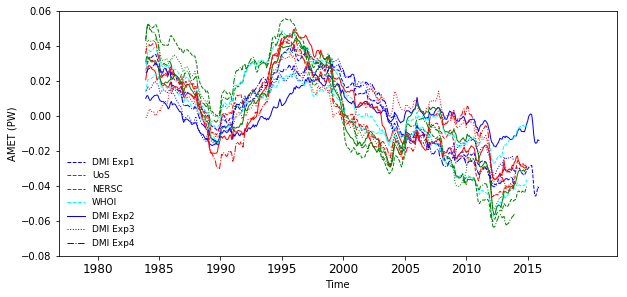

In [21]:
################################   Anomalies at certain sections  ######################################
################################   only ensemble mean is used     ######################################
####################### color map #######################
####            EC Earth (NLeSC) : 'darkblue'        ####
####            EC Earth (DMI)   : 'blue'            ####
####            HadGEM (UoS)     : 'red'             ####
####            NorESM (NERSC)   : 'green'           ####
####            WACCM6 (WHOI)    : 'cyan'            ####
####        IAP-AGCM (IAP-NZC)   : 'gray'            ####
####################### color map #######################
####################### linestyles ######################
####          exp 1 (control)     : '--'             ####
####          exp 2 (sic fixed)   : '-'              ####
####          exp 3 (PDO removed) : ':'              ####
####          exp 4 (AMO removed) : '-.'             ####
####################### color map #######################
# lat 60N
lat_DMI_60N = 42
lat_WHOI_60N = 32
lat_NERSC_60N = 32
lat_UoS_60N = 57
lat_CMCC_60N = 32
# lowpass filter window
window=60 # month
# index
index_1979_2013 = np.arange(1,35*12+1,1)
index_1979_2014 = np.arange(1,36*12+1,1)
index_1979_2015 = np.arange(1,37*12+1,1)
index_year = np.arange(1980,2020,5)

# EC Earth (DMI)
ens_avg_DMI_exp1 = analyzer.statistics(np.mean(AMET_DMI_exp1[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp1.anomaly(Dim_ens=False)
ens_avg_DMI_exp1.lowpass(Dim_ens=False)
ens_avg_DMI_exp2 = analyzer.statistics(np.mean(AMET_DMI_exp2[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp2.anomaly(Dim_ens=False)
ens_avg_DMI_exp2.lowpass(Dim_ens=False)
ens_avg_DMI_exp3 = analyzer.statistics(np.mean(AMET_DMI_exp3[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp3.anomaly(Dim_ens=False)
ens_avg_DMI_exp3.lowpass(Dim_ens=False)
ens_avg_DMI_exp4 = analyzer.statistics(np.mean(AMET_DMI_exp4[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp4.anomaly(Dim_ens=False)
ens_avg_DMI_exp4.lowpass(Dim_ens=False)

# HadGEM (UoS)
ens_avg_UoS_exp1 = analyzer.statistics(np.mean(AMET_UoS_exp1[:,:,:,lat_UoS_60N],0))
ens_avg_UoS_exp1.anomaly(Dim_ens=False)
ens_avg_UoS_exp1.lowpass(Dim_ens=False)
ens_avg_UoS_exp2 = analyzer.statistics(np.mean(AMET_UoS_exp2[:,:,:,lat_UoS_60N],0))
ens_avg_UoS_exp2.anomaly(Dim_ens=False)
ens_avg_UoS_exp2.lowpass(Dim_ens=False)
ens_avg_UoS_exp3 = analyzer.statistics(np.mean(AMET_UoS_exp3[:,:,:,lat_UoS_60N],0))
ens_avg_UoS_exp3.anomaly(Dim_ens=False)
ens_avg_UoS_exp3.lowpass(Dim_ens=False)
ens_avg_UoS_exp4 = analyzer.statistics(np.mean(AMET_UoS_exp4[:,:,:,lat_UoS_60N],0))
ens_avg_UoS_exp4.anomaly(Dim_ens=False)
ens_avg_UoS_exp4.lowpass(Dim_ens=False)

# NorESM (NERSC)
ens_avg_NERSC_exp1 = analyzer.statistics(np.mean(AMET_NERSC_exp1[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp1.anomaly(Dim_ens=False)
ens_avg_NERSC_exp1.lowpass(Dim_ens=False)
ens_avg_NERSC_exp2 = analyzer.statistics(np.mean(AMET_NERSC_exp2[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp2.anomaly(Dim_ens=False)
ens_avg_NERSC_exp2.lowpass(Dim_ens=False)
ens_avg_NERSC_exp3 = analyzer.statistics(np.mean(AMET_NERSC_exp3[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp3.anomaly(Dim_ens=False)
ens_avg_NERSC_exp3.lowpass(Dim_ens=False)
ens_avg_NERSC_exp4 = analyzer.statistics(np.mean(AMET_NERSC_exp4[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp4.anomaly(Dim_ens=False)
ens_avg_NERSC_exp4.lowpass(Dim_ens=False)

# WACCM6 (WHOI)
ens_avg_WHOI_exp1 = analyzer.statistics(np.mean(AMET_WHOI_exp1[:,:,:,lat_WHOI_60N],0))
ens_avg_WHOI_exp1.anomaly(Dim_ens=False)
ens_avg_WHOI_exp1.lowpass(Dim_ens=False)
ens_avg_WHOI_exp2 = analyzer.statistics(np.mean(AMET_WHOI_exp2[:,:,:,lat_WHOI_60N],0))
ens_avg_WHOI_exp2.anomaly(Dim_ens=False)
ens_avg_WHOI_exp2.lowpass(Dim_ens=False)

# EC Earth (DMI) interannual
fig = plt.figure(figsize=(10,4.5))
# Exp1
# EC Earth (DMI)
plt.plot(index_1979_2015[window-1:], ens_avg_DMI_exp1._lowpass, color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI) Exp1')
# HadGEM (UoS)
plt.plot(index_1979_2014[window-1:], ens_avg_UoS_exp1._lowpass, color='red', linestyle='--', linewidth=1, label='UoS')
# NorESM (NERSC)
plt.plot(index_1979_2014[window-1:], ens_avg_NERSC_exp1._lowpass, color='green', linestyle='--', linewidth=1, label='NERSC')
# WACCM6 (WHOI)
plt.plot(index_1979_2014[window-1:], ens_avg_WHOI_exp1._lowpass, color='cyan', linestyle='--', linewidth=1, label='WHOI')
# Exp2
# EC Earth (DMI)
plt.plot(index_1979_2015[window-1:], ens_avg_DMI_exp2._lowpass, color='blue', linestyle='-', linewidth=1, label='EC Earth (DMI) Exp2')
# HadGEM (UoS)
plt.plot(index_1979_2014[window-1:], ens_avg_UoS_exp2._lowpass, color='red', linestyle='-', linewidth=1)
# NorESM (NERSC)
plt.plot(index_1979_2014[window-1:], ens_avg_NERSC_exp2._lowpass, color='green', linestyle='-', linewidth=1)
# WACCM6 (WHOI)
plt.plot(index_1979_2014[window-1:], ens_avg_WHOI_exp2._lowpass, color='cyan', linestyle='--', linewidth=1)
# Exp3
# EC Earth (DMI)
plt.plot(index_1979_2013[window-1:], ens_avg_DMI_exp3._lowpass, color='blue', linestyle=':', linewidth=1, label='EC Earth (DMI) Exp3')
# HadGEM (UoS)
plt.plot(index_1979_2013[window-1:], ens_avg_UoS_exp3._lowpass, color='red', linestyle=':', linewidth=1)
# NorESM (NERSC)
plt.plot(index_1979_2013[window-1:], ens_avg_NERSC_exp3._lowpass, color='green', linestyle=':', linewidth=1)
# Exp4
# EC Earth (DMI)
plt.plot(index_1979_2013[window-1:], ens_avg_DMI_exp4._lowpass, color='blue', linestyle='-.', linewidth=1, label='EC Earth (DMI) Exp4')
# HadGEM (UoS)
plt.plot(index_1979_2013[window-1:], ens_avg_UoS_exp4._lowpass, color='red', linestyle='-.', linewidth=1)
# NorESM (NERSC)
plt.plot(index_1979_2013[window-1:], ens_avg_NERSC_exp4._lowpass, color='green', linestyle='-.', linewidth=1)

plt.xlabel("Time")
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=12)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)")
plt.ylim(-0.08,0.06)
plt.legend(frameon=False, loc=3, prop={'size': 9})
plt.show()
fig.savefig(os.path.join(output_path,'Anomaly_lowpass_{}_60N_ensAvg_AMIP.png'.format(window)),dpi=200)
plt.close(fig)